# 題目:  Logistic Regression 進行分類，並與 polynomial regression 比較效能。
    姓名: 施宏勲
    學號: 5114029040
---

## 讀取前處理資料

In [44]:
import numpy as np
import pandas as pd

# 讀取前處理後的資料
data = pd.read_csv("../week7_hw_data_processing/output/feature_select_by_myself.csv")
X = data.drop("y", axis=1)
y = data["y"]
X.head()

,age,education,balance,housing,loan,campaign,previous,poutcome,contacted,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,contact_unknown
0,1.606965,3.0,0.256419,1.0,0.0,-0.569351,-0.25194,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.288529,2.0,-0.437895,1.0,0.0,-0.569351,-0.25194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.747384,2.0,-0.446762,1.0,1.0,-0.569351,-0.25194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.571051,0.0,0.047205,1.0,0.0,-0.569351,-0.25194,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.747384,0.0,-0.447091,0.0,0.0,-0.569351,-0.25194,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 分割資料成訓練集和測試集，評估 Logistic Regression 模型效能

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)

# 分割資料成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]


Y_scores = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, Y_scores)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

# 評估 Logistic Regression 模型效能
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("評估 Logistic Regression 效果")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

FPR: [0.         0.         0.         ... 0.99547852 0.99547852 1.        ]
TPR: [0.00000000e+00 9.25069380e-04 2.77520814e-03 ... 9.99074931e-01
 1.00000000e+00 1.00000000e+00]
Thresholds: [        inf  1.50100739  1.19853868 ... -4.86596522 -4.87984375
 -8.1894485 ]
評估 Logistic Regression 效果
Accuracy: 0.8915
Precision: 0.7000
Recall: 0.1619
F1-Score: 0.2630


## Plot ROC 出來，檢查效果

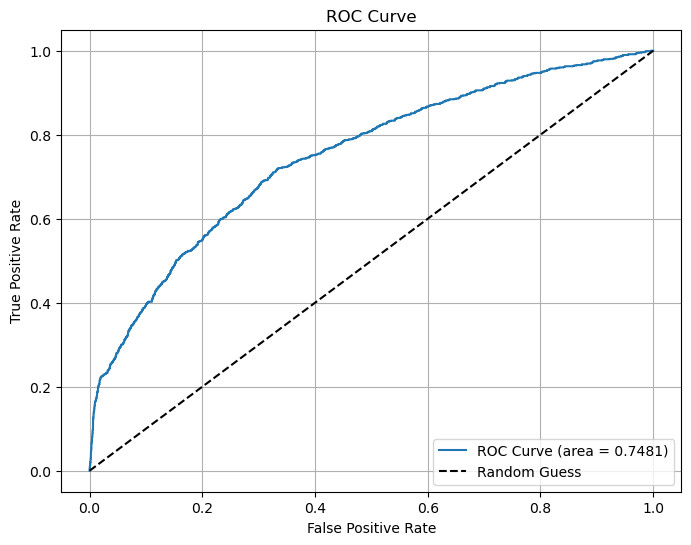

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (area = %0.4f)" % auc)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## 多項式回歸預測與評估

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 想要嘗試的幾個 degree，4以上跑不動
degrees = [2, 3]
scores = []

for degree in degrees:
    # 創建多項式特徵
    pf = PolynomialFeatures(degree=degree)
    X_poly = pf.fit_transform(X)

    # 拆分多項式特徵資料集
    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
        X_poly, y, test_size=0.2, random_state=1000
    )

    # 建立線性回歸模型，用全部核心來運算
    poly_reg = LinearRegression(n_jobs=-1)
    poly_reg.fit(X_poly_train, y_poly_train)

    # 多項式回歸預測與評估
    y_poly_pred = poly_reg.predict(X_poly_test)
    r2 = r2_score(y_poly_test, y_poly_pred)
    
    scores.append(r2)

# 輸出每個 degree 的 R² 分數
print(scores)

best_degree = degrees[np.argmax(scores)]
best_score = max(scores)

print("\nPolynomial Regression 效能:")
print(f"\n最佳 degree: {best_degree}, 最佳平均 R²: {best_score:.4f}")

[0.14970043922633725, 0.09065845615210355]

Polynomial Regression 效能:

最佳 degree: 2, 最佳平均 R²: 0.1497


## 我嘗試使用 degree = 4，但多項式特徵數量爆炸，導致記憶體耗盡被中斷，所以只有嘗試到 3，且 3 的 R² 已經非常低

錯誤訊息
   ```
   ---------------------------------------------------------------------------
   KeyboardInterrupt                         Traceback (most recent call last)
   Cell In[6], line 21
        19 # 建立線性回歸模型，用全部核心來運算
        20 poly_reg = LinearRegression(n_jobs=-1)
   ---> 21 poly_reg.fit(X_poly_train, y_poly_train)
        23 # 多項式回歸預測與評估
        24 y_poly_pred = poly_reg.predict(X_poly_test)


   File c:\Users\Finn\.conda\envs\ml_hw\Lib\site-packages\sklearn\base.py:1365, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
      1358     estimator._validate_params()
      1360 with config_context(
      1361     skip_parameter_validation=(
      1362         prefer_skip_nested_validation or global_skip_validation
      1363     )
      1364 ):
   -> 1365     return fit_method(estimator, *args, **kwargs)


   File c:\Users\Finn\.conda\envs\ml_hw\Lib\site-packages\sklearn\linear_model\_base.py:701, in LinearRegression.fit(self, X, y, sample_weight)
       698 else:
       699     # cut-off ratio for small singular values
       700     cond = max(X.shape) * np.finfo(X.dtype).eps
   --> 701     self.coef_, _, self.rank_, self.singular_ = linalg.lstsq(X, y, cond=cond)
       702     self.coef_ = self.coef_.T
       704 if y.ndim == 1:


   File c:\Users\Finn\.conda\envs\ml_hw\Lib\site-packages\scipy\_lib\_util.py:1233, in _apply_over_batch.<locals>.decorator.<locals>.wrapper(*args, **kwargs)
      1231 # Early exit if call is not batched
      1232 if not any(batch_shapes):
   -> 1233     return f(*arrays, *other_args, **kwargs)
      1235 # Determine broadcasted batch shape
      1236 batch_shape = np.broadcast_shapes(*batch_shapes)  # Gives OK error message


   File c:\Users\Finn\.conda\envs\ml_hw\Lib\site-packages\scipy\linalg\_basic.py:1508, in lstsq(a, b, cond, overwrite_a, overwrite_b, check_finite, lapack_driver)
      1504 if info < 0:
      1505     raise ValueError(
      1506         f'illegal value in {-info}-th argument of internal {lapack_driver}'
      1507     )
   -> 1508 resids = np.asarray([], dtype=x.dtype)
      1509 if m > n:
      1510     x1 = x[:n]


   KeyboardInterrupt:
   ```